In [47]:
import numpy as np
import matplotlib.pyplot as plt
import time

def LBM(a, b):
    scale = 1
    Nx = 102
    Ny = 22
    delta = .5
    H = Ny - 3
    Nt = a
    v = 9
    vmap = range(0, v, 1)
    tau = b
    dpdx = 1e-05
    rho0 = 1
    cs = np.sqrt(1 / 3)
    V = cs**2 * (tau - .5)

    cx = [0, 1, 0, -1, 0, -1, 1, -1, 1]
    cy = [0, 0, 1, 0, -1, 1, 1, -1, -1]
    w = [4 / 9, 1 / 9, 1 / 9, 1 / 9, 1 / 9, 1 / 36, 1 / 36, 1 / 36, 1 / 36]
    kb = [0, 3, 4, 1, 2, 8, 7, 6, 5]
    isn = np.zeros((Nx, Ny))

    f = np.zeros((v, Nx, Ny))
    ft = np.zeros((v, Nx, Ny))
    term1 = np.zeros((v, Nx, Ny))
    term2 = np.zeros((v, Nx, Ny))

    ux = np.zeros((Nx, Ny))
    uy = np.zeros((Nx, Ny))
    u2 = np.zeros((Nx, Ny))
    rho = np.zeros((Nx, Ny))
    source = np.zeros((Nx, Ny))
    feq = np.zeros((Nx, Ny))
    onemat = np.ones((Nx, Ny))

    tic = time.time()

    for i in range(0, Nx, 1):
        for j in range(0, Ny, 1):
            if j == 0 or j == Ny - 1:
                isn[i][j] = 1
            else:
                isn[i][j] = 0
            f[:, i, j] = [w[k] * rho0 for k in vmap]

    for t in range(1, Nt + 1, 1):
        for i in range(0, Nx, 1):
            for j in range(1, Ny - 1, 1):
                rho[i, j] = np.sum(f[:, i, j], axis=0)
                ux[i, j] = (np.sum([f[k, i, j] * cx[k] for k in vmap]) + 0.5 * dpdx) / rho[i, j]
                uy[i, j] = np.sum([f[k, i, j] * cy[k] for k in vmap]) / rho[i, j]

        u2 = np.multiply(ux, ux) + np.multiply(uy, uy)
        term1 = np.array([ux * cx[k] + uy * cy[k] for k in vmap])
        term2 = np.multiply(term1, term1)
        source = np.array([(1.0 - 0.5 / tau) * w[k] * (3 * (cx[k] - ux) + 9 * (cx[k] * ux + cy[k] * uy) * cx[k]) * dpdx for k in vmap])
        feq = np.array([w[k] * rho * (onemat + 3 * term1[k] + 4.5 * term2[k] - 1.5 * u2) for k in vmap])
        ft = np.array([f[k] - (f[k] - feq[k]) / tau + source[k] for k in vmap])

        f[1, :, 1:-1] = np.roll(ft[1, :, 1:-1], [1, 0], axis=(0, 1))
        f[2, :, 1:-1] = np.roll(ft[2, :, 1:-1], [0, 1], axis=(0, 1))
        f[3, :, 1:-1] = np.roll(ft[3, :, 1:-1], [-1, 0], axis=(0, 1))
        f[4, :, 1:-1] = np.roll(ft[4, :, 1:-1], [0, -1], axis=(0, 1))
        f[5, :, 1:-1] = np.roll(ft[5, :, 1:-1], [-1, 1], axis=(0, 1))
        f[6, :, 1:-1] = np.roll(ft[6, :, 1:-1], [1, 1], axis=(0, 1))
        f[7, :, 1:-1] = np.roll(ft[7, :, 1:-1], [-1, -1], axis=(0, 1))
        f[8, :, 1:-1] = np.roll(ft[8, :, 1:-1], [1, -1], axis=(0, 1))

        for i in range(0, Nx, 1):
            for j in range(0, Ny, 1):
                if isn[i][j] == 0:
                    for k in vmap:
                        ia = i - cx[k]
                        ja = j - cy[k]
                        if ia < 0:
                            ia = Nx - 1
                        elif ia > Nx - 1:
                            ia = 0
                        if isn[ia][ja] == 1:
                            oppV = int(kb[k])
                            f[k][i][j] = f[oppV][i][j]

    timingprocess = time.time() - tic

    momentx = []
    momenty = []
    height = []

    ux_exact = [0] * (Ny - 2)
    for j in range(0, Ny - 2, 1):
        y = j / H
        y2 = y * y
        ux_exact[j] = 0.5 * dpdx * H * H * (y - y2) / V
        height.append(j)

    i = 10
    for j in range(1, Ny - 1, 1):
        rho = 0.0
        ux = 0.0
        uy = 0.0
        for k in vmap:
            rho += f[k][i][j]
            ux += f[k][i][j] * cx[k]
            uy += f[k][i][j] * cy[k]
        ux /= rho
        uy /= rho
        momentx.append(ux)
        momenty.append(uy)

    um = max(momentx)
    Umax.append(um)
    ProcessingTime.append(timingprocess)

    print(f"\t Nt = {Nt} \t Umax = {um} \t TimingProcess = {timingprocess}")


## Profile de vitesse et saturation : 

1. J'ai choisi la valeur initiale de Nt et après, je l'ai augmentée par x1.5, et puis j'ai utilise un boucle pour looper sur les valeurs suivante de Nt , et j'ai utilisé une boucle pour itérer sur les valeurs suivantes de Nt_values = [100, 150, 225, 337, 506, 760, 1140,1710,2500,3845], et à chaque itération, j'ai ajouté la valeur de la vitesse maximale et le temps de calcul à leurs tableaux ( Umax[] et ProcessingTime[] )


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import time
Nt_values = [100, 150, 225, 337, 506, 1140,1710,2500] 
Umax = []
ProcessingTime = []
tau = 0.798

def LBM(Nt,tau) :
    print(f"Calculs started for Nt = {Nt}")
    # The code u sent us (Look at the First cell )
    # I added these 2 lines to print results:
    timingprocess = time.time() - tic # when calulating process ends
    # ...
    print(f"\t Nt = {Nt} \t Umax = {um} \t TimingProcess = {timingprocess}")

i = 0
while i < len(Nt_values):
    LBM(Nt_values[i],tau)
    i += 1


In [ ]:
# Results :

#  Nt = 100        Umax = 0.000985559321601017     TimingProcess = 4.502385377883911
#  Nt = 150        Umax = 0.0014297034806185465    TimingProcess = 6.386449813842773
#  Nt = 225        Umax = 0.0020018851276040195    TimingProcess = 9.231114625930786
#  Nt = 337        Umax = 0.002669347994283162     TimingProcess = 16.41728377342224
#  Nt = 506        Umax = 0.00336040508008113      TimingProcess = 29.32803964614868
#  Nt = 1140       Umax = 0.004332551131654144     TimingProcess = 63.28317093849182
#  Nt = 1710       Umax = 0.004498300123024538     TimingProcess = 95.83822250366211
#  Nt = 2500       Umax = 0.00453762691443087      TimingProcess = 120.88708853721619


2. Par la bibliothèque matplotlib : J'ai tracé Um en fonction de Nt, le temps de calcul en fonction de Nt, et le temps de calcul en fonction de Um .

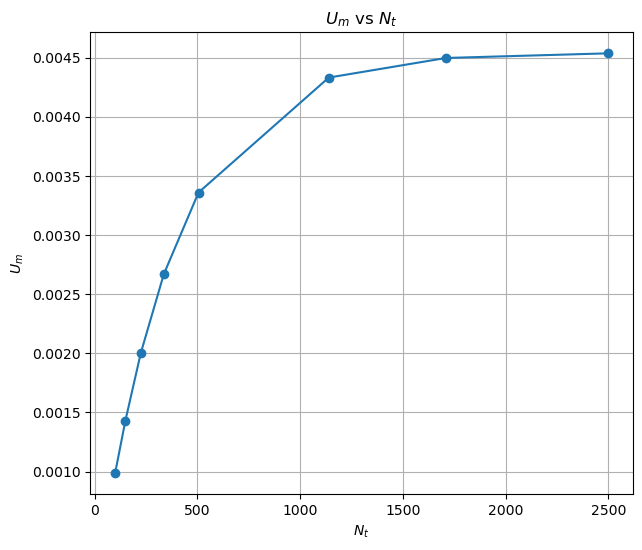

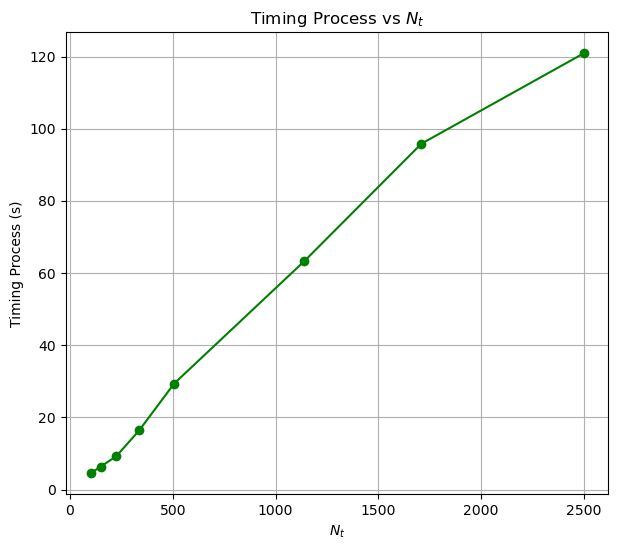

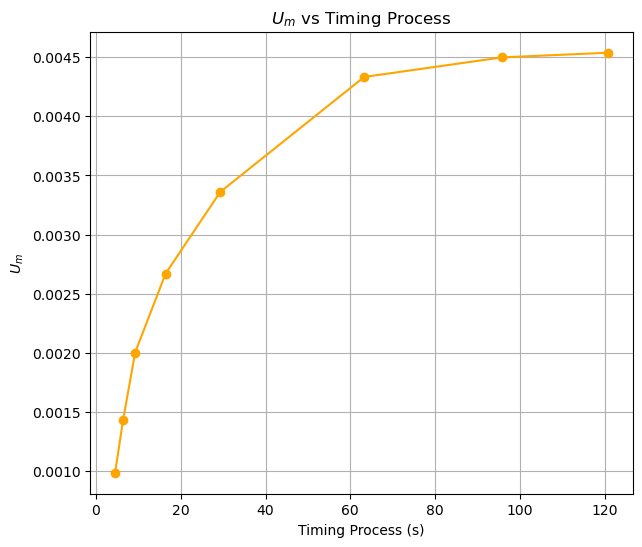

In [37]:
import matplotlib.pyplot as plt

# Data from the steps
steps = [0, 1, 2, 3, 4, 5, 6, 7, 8]
N_t_values = [100, 150, 225, 337, 506,  1140, 1710, 2500]
U_m_values = [
    0.000985559321601017, 
    0.0014297034806185465, 
    0.0020018851276040195, 
    0.002669347994283162, 
    0.00336040508008113, 
    0.004332551131654144, 
    0.004498300123024538, 
    0.00453762691443087
]
timing_process_values = [
    4.502385377883911, 
    6.386449813842773, 
    9.231114625930786, 
    16.41728377342224, 
    29.32803964614868, 
    63.28317093849182, 
    95.83822250366211, 
    120.88708853721619
]
plt.figure(figsize=(7, 6))
plt.plot(N_t_values, U_m_values, marker='o')
plt.xlabel(r'$N_t$')
plt.ylabel(r'$U_m$')
plt.title(r'$U_m$ vs $N_t$')
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 6))
plt.plot(N_t_values, timing_process_values, marker='o', color='green')
plt.xlabel(r'$N_t$')
plt.ylabel('Timing Process (s)')
plt.title('Timing Process vs $N_t$')
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 6))
plt.plot(timing_process_values, U_m_values, marker='o', color='orange')
plt.xlabel('Timing Process (s)')
plt.ylabel(r'$U_m$')
plt.title(r'$U_m$ vs Timing Process')
plt.grid(True)
plt.show()

3. Interprétation des résultats obtenus :
 
    Courbe 1 : On remarque que la vitesse maximale augmente lorsque le nombre d'itérations (Nt) augmente, jusqu'à un point de saturation où Vm = 0.0046, d'après Nt = 2500 itérations.Comme dans les méthodes de Monte Carlo et le modèle du champ moyen, il est essentiel que le modèle numérique converge. L'objectif est toujours d'optimiser les paramètres du système afin qu'il se stabilise, ce qui permet de minimiser la complexité temporelle.

   Courbe 2 : J'ai tracé la courbe 2 pour déterminer la nature de la complexité temporelle ( o(n) , o(n^2) ,o(e^n)). J'ai trouvé que le temps de calcul suit une relation linéaire avec Nt. Donc on peut écrire que le temps de calcul t  = 0.046Nt ( a= 0.046 d'apres la courbe) ,cad  a complexité temporelle : o(n)

   Courbe 3 : C'est juste une confirmation  des résultats dans les courbes 1 et 2. La vitesse maximale augmente pour atteindre une valeur maximale, mais après ce point, il n'est plus nécessaire de consacrer autant de temps,puisque Vmax sera le meme .

## Impact du temps de relaxation (tau)

1. On varie le temps de relaxation (tau) parmi les valeurs suivantes : [0.1, 0.5, 0.798, 1, 1.5, 2]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

tau_values = [0.1, 0.5, 0.798, 1, 1.5, 2]
Umax = []

def LBM(tau) :
    # The code u sent us (Look at the First cell )
    # I added this line to save results:
    Umax.append(um)

i = 0
while i < len(Nt_values):
    LBM(tau_values[i])
    i += 1

print(Umax)

2. la vitesse maximale en fonction de Nt pour chaque valeur de tau : 0.798, 1, 1.5, 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

tau_values = [0.798, 1, 1.5, 2]  # le programme diverge dans 0.1 et 0.5 
Nt_values = [50, 100, 160, 300, 500, 750, 1400, 1900, 2300, 2700]

def LBM(Nt,tau) :
    # The code u sent us 
    # I added this one line to save results:
    Umax.append(um)
    
i = 0
while i < len(tau_values):
    print("\n \n Calculs started for tau = ",tau_values[i])
    j = 0
    while j < len(Nt_values):
        Umax = []
        LBM(Nt_values[j],tau_values[i])
        print(" \t Nt =  ",Nt_values[j],"\t Vm = ",Umax[0])
        j +=1
    i += 1


3. le nombre d'itérations nécessaires pour atteindre la saturation ( `ts`) pour chaque `tau`: On considère que la stabilisation est satisfaite si  Vm(new) - Vm(old) <= 0.000001 (6 chiffres après la virgule)

In [ ]:
# Results : 

# Pour tau =  0.798 , ts = 2900
#-------------------------------------
# Calculs started.
#         Nt =   50       Vm =  0.0004997493375163631
#         Nt =   100      Vm =  0.000985559321601017
#         Nt =   160      Vm =  0.0015124940674607706
#         Nt =   300      Vm =  0.002470804368745767
#         Nt =   500      Vm =  0.0033409240255997106
#         Nt =   750      Vm =  0.003934488381347582
#         Nt =   1400     Vm =  0.004439255877173924
#         Nt =   1900     Vm =  0.0045162803295076635
#         Nt =   2300     Vm =  0.004533880460142447
#         Nt =   2700     Vm =  0.004539799565552417

# Pour tau =  1 , ts = 1900
#---------------------------------
#Calculs started.
#         Nt =   50       Vm =  0.0004961966596516096
#         Nt =   100      Vm =  0.0009399395067602747
#         Nt =   160      Vm =  0.0013645099180010561
#         Nt =   300      Vm =  0.0020036367934235795
#         Nt =   500      Vm =  0.0024318955074038315
#         Nt =   750      Vm =  0.0026275870646875073
#         Nt =   1400     Vm =  0.0027149170135397473
#         Nt =   1900     Vm =  0.002719189422675754
#         Nt =   2300     Vm =  0.002719598089609523
#         Nt =   2700     Vm =  0.002719664098224065
         
# Pour tau =  1.5 , ts = 920
#-----------------------------------
 #Calculs started.
#         Nt =   50       Vm =  0.0004710722125528407
#         Nt =   100      Vm =  0.0008009880121014706
#         Nt =   160      Vm =  0.001043564814231675
#         Nt =   300      Vm =  0.0012852218914711474
#         Nt =   500      Vm =  0.001364476318167998
#         Nt =   750      Vm =  0.0013783707536739536
#         Nt =   920      Vm =  0.001379638499530582
#         Nt =   1200     Vm =  0.0013799576133913306
#         Nt =   1400     Vm =  0.001379980614318296
#         Nt =   1900     Vm =  0.0013799850664530618
#         Nt =   2300     Vm =  0.0013799851139159802
#         Nt =   2700     Vm =  0.0013799851151870138
         
#Pour tau =  2 , ts = 620
#-----------------------------------
 #Calculs started.
#         Nt =   50       Vm =  0.00043875631097512656
#         Nt =   100      Vm =  0.000683431527202295
#         Nt =   160      Vm =  0.000825245096563162
#         Nt =   300      Vm =  0.0009224424903019927
#         Nt =   500      Vm =  0.0009387960638673278
#         Nt =   620      Vm =  0.0009397569041222656
#         Nt =   750      Vm =  0.0009399551410288152
#         Nt =   820      Vm =  0.0009399807325570614
#         Nt =   920      Vm =  0.0009399928718013822
#         Nt =   1200     Vm =  0.0009399970712741287
#         Nt =   1900     Vm =  0.0009399971718993853
#         Nt =   1400     Vm =  0.0009399971650225194
 

4. Traçage  des résultats:
   - `ts` en fonction de `tau`.
   - La vitesse maximale (`um`) en fonction de `tau`.

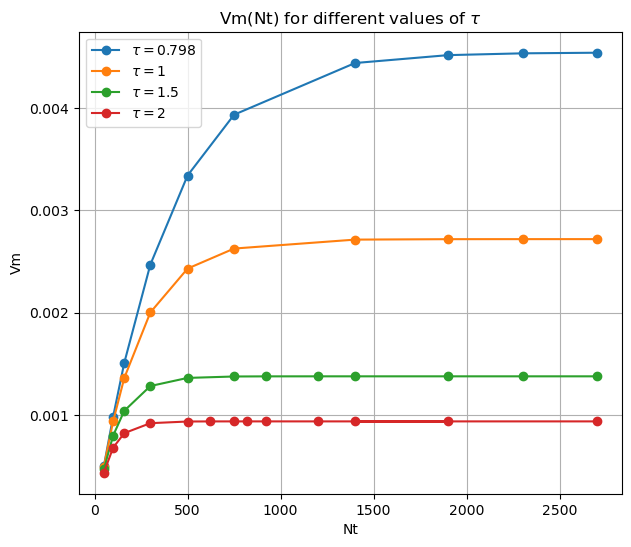

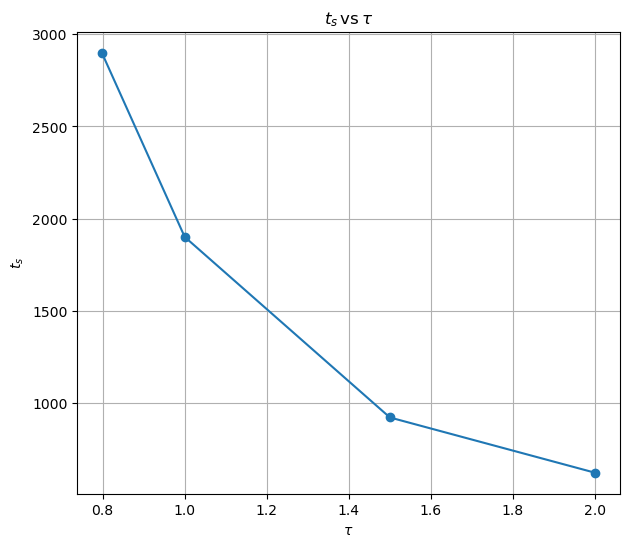

In [31]:
import matplotlib.pyplot as plt

tau_values = [0.798, 1, 1.5, 2]
ts_values = [2900, 1900, 920, 620]

Nt_0_798 = [50, 100, 160, 300, 500, 750, 1400, 1900, 2300, 2700]
Vm_0_798 = [0.0004997493375163631, 0.000985559321601017, 0.0015124940674607706, 0.002470804368745767, 
            0.0033409240255997106, 0.003934488381347582, 0.004439255877173924, 0.0045162803295076635, 
            0.004533880460142447, 0.004539799565552417]

Nt_1 = [50, 100, 160, 300, 500, 750, 1400, 1900, 2300, 2700]
Vm_1 = [0.0004961966596516096, 0.0009399395067602747, 0.0013645099180010561, 0.0020036367934235795, 
        0.0024318955074038315, 0.0026275870646875073, 0.0027149170135397473, 0.002719189422675754, 
        0.002719598089609523, 0.002719664098224065]

Nt_1_5 = [50, 100, 160, 300, 500, 750, 920, 1200, 1400, 1900, 2300, 2700]
Vm_1_5 = [0.0004710722125528407, 0.0008009880121014706, 0.001043564814231675, 0.0012852218914711474, 
          0.001364476318167998, 0.0013783707536739536, 0.001379638499530582, 0.0013799576133913306, 
          0.001379980614318296, 0.0013799850664530618, 0.0013799851139159802, 0.0013799851151870138]

Nt_2 = [50, 100, 160, 300, 500, 620, 750, 820, 920, 1200, 1900, 1400,2700]
Vm_2 = [0.00043875631097512656, 0.000683431527202295, 0.000825245096563162, 0.0009224424903019927, 
        0.0009387960638673278, 0.0009397569041222656, 0.0009399551410288152, 0.0009399807325570614, 
        0.0009399928718013822, 0.0009399970712741287, 0.0009399971718993853, 0.0009399971650225194,
        0.000939997171906404]

plt.figure(figsize=(7, 6))
plt.plot(Nt_0_798, Vm_0_798, label=r'$\tau = 0.798$', marker='o')
plt.plot(Nt_1, Vm_1, label=r'$\tau = 1$', marker='o')
plt.plot(Nt_1_5, Vm_1_5, label=r'$\tau = 1.5$', marker='o')
plt.plot(Nt_2, Vm_2, label=r'$\tau = 2$', marker='o')
plt.xlabel('Nt')
plt.ylabel('Vm')
plt.title(r'Vm(Nt) for different values of $\tau$')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7,6))
plt.plot(tau_values, ts_values, marker='o')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$t_s$')
plt.title(r'$t_s \, \text{vs} \, \tau$')
plt.grid(True)
plt.show()

5. Interprétation des résultats obtenus :

On remarque que pour des valeurs petites de (par exemple, τ=0.1 et τ=0.5), le programme ne converge pas puisque la vitesse diverge tres rapide). En revanche, lorsque τ augmente, ts diminue et le système devient plus stable. De plus, on observe que lorsque τ augmente, V m diminue, ce qui est attendu, car τ représente le temps nécessaire pour qu'une particule revienne à son état d'équilibre après une perturbation. Ainsi, une augmentation de τ implique que les particules se déplacent plus lentement.
                        τ augmente ==>  les particules se déplacent lentement.
   

In [ ]:
## Implémentation du schéma D2Q5

Je vais répéter les mêmes étapes que dans les questions précédentes, et à la fin, je comparerai les résultats. Je suis convaincu que nous conclurons que D2Q5 a une complexité temporelle inférieure à celle de D2Q9, mais que D2Q9 est plus précis.
## Je préfère répéter exactement la même chose, mais cette fois, j'ajoute un mur dans le fluide et je refais les calculs (comme vous avez dit dans la classe)

In [ ]:
1.La simulation de geometrie : (1) represente Solide , (0) Represente fluide

In [ ]:
Nx = 10 # in real case, we will use Nx = 200,Ny=100
Ny = 5
for i in range(0, Nx, 1):
    for j in range(0, Ny, 1):
        if i == 0 or i == Nx-1:
            isn[i][j] = 1  # nœud solide (murs du canal)
        elif 6 <= i <= 10 and 3 <= j <= 7:  # Solide dans le fluide
            isn[i][j] = 1 
        else:
            isn[i][j] = 0  
print(isn)

Temps d'exécution = 55.95298671722412 secondes



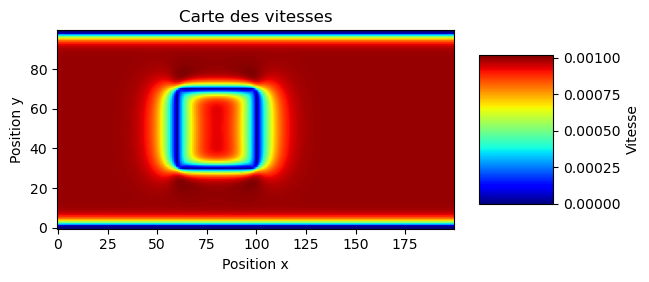

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Définition des paramètres du système
scale = 1  # échelle de l'espace (utile si vous avez besoin de redimensionner plus tard)
Nx = 200    # nombre de points en x (largeur du canal)
Ny = 100     # nombre de points en y (hauteur du canal)
delta = .5  # échelle du milieu de la grille
H = Ny - 3  # hauteur du canal, laissant de la place pour les nœuds tampon
Nt = 100   # nombre d'itérations (étapes de temps)
v = 9       # nombre de vitesses dans la méthode D2Q9
vmap = range(0,v,1)  # liste des indices de vitesse
tau = float(.798)  # temps de relaxation pour un problème dominé par l'advection
dpdx = 1e-05  # gradient de pression
rho0 = 1      # densité initiale du fluide
cs = np.sqrt(1/3)  # vitesse du son dans les unités de la grille
V = cs**2*(tau-.5)  # viscosité cinématique

# Définition des vitesses dans les directions x et y (modèle D2Q9)
cx = [0, 1, 0, -1, 0, -1, 1, -1, 1]  # vitesses dans la direction x
cy = [0, 0, 1, 0, -1, 1, 1, -1, -1]  # vitesses dans la direction y
w = [4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36]  # poids associés aux vitesses
kb = [0, 3, 4, 1, 2, 8, 7, 6, 5]  # table d'indices 
isn = np.zeros((Nx, Ny))  # matrice indiquant les nœuds solides (1) et les nœuds fluides (0)

# Initialisation des champs de distribution
f = np.zeros((v, Nx, Ny))  # tableau des distributions
ft = np.zeros((v, Nx, Ny))  # tableau temporaire pour les distributions
term1 = np.zeros((v, Nx, Ny))  # premier terme dans l'équilibre
term2 = np.zeros((v, Nx, Ny))  # second terme dans l'équilibre

# Champs de vitesses et densité
ux = np.zeros((Nx, Ny))  # composante x de la vitesse
uy = np.zeros((Nx, Ny))  # composante y de la vitesse
u2 = np.zeros((Nx, Ny))  # vitesse au carré
rho = np.zeros((Nx, Ny))  # densité du fluide
source = np.zeros((Nx, Ny))  # source externe (force de pression)
feq = np.zeros((Nx, Ny))  # distribution d'équilibre
onemat = np.ones((Nx, Ny))  # matrice de 1 utilisée pour les calculs

# Enregistrement du temps de départ
tic = time.time()

# Initialisation des nœuds solides et fluides
for i in range(0, Nx, 1):
    for j in range(0, Ny, 1):
        if j == 0 or j == Ny-1:
            isn[i][j] = 1  # nœud solide (murs du canal)
        elif (60<i<100) and (30<j<70) :
            isn[i][j] = 1  # nœud solide (murs du canal) 
        else:
            isn[i][j] = 0  # nœud fluide
        f[:, i, j] = [w[k] * rho0 for k in vmap]  # initialisation des distributions avec la densité rho0

# Boucle principale pour les étapes de temps (simulation du flux)
for t in range(1, Nt + 1, 1):
    # Calcul des moments (densité, vitesses) à chaque itération
    for i in range(0, Nx, 1):
        for j in range(1, Ny - 1, 1):  # on ne considère que les nœuds fluides
            rho[i, j] = np.sum(f[:, i, j], axis=0)  # moment d'ordre 0 (densité)
            ux[i, j] = (np.sum([f[k, i, j] * cx[k] for k in vmap]) + 0.5 * dpdx) / rho[i, j]  # moment d'ordre 1, composante x, avec la pression
            uy[i, j] = np.sum([f[k, i, j] * cy[k] for k in vmap]) / rho[i, j]  # moment d'ordre 1, composante y
    
    u2 = np.multiply(ux, ux) + np.multiply(uy, uy) 
    term1 = np.array([ux * cx[k] + uy * cy[k] for k in vmap])  # calcul des termes intermédiaires pour l'équilibre
    term2 = np.multiply(term1, term1)  # calcul du second terme
    source = np.array([(1.0 - 0.5 / tau) * w[k] * (3 * (cx[k] - ux) + 9 * (cx[k] * ux + cy[k] * uy) * cx[k]) * dpdx for k in vmap])  # source de pression
    feq = np.array([w[k] * rho * (onemat + 3 * term1[k] + 4.5 * term2[k] - 1.5 * u2) for k in vmap])  # distribution d'équilibre
    ft = np.array([f[k] - (f[k] - feq[k]) / tau + source[k] for k in vmap])  # mise à jour des distributions

    # La périodicité n'existe qu'en direction x, donc on applique la rotation uniquement dans cette direction
    f[1, :, 1:-1] = np.roll(ft[1, :, 1:-1], [1, 0], axis=(0, 1))
    f[2, :, 1:-1] = np.roll(ft[2, :, 1:-1], [0, 1], axis=(0, 1))
    f[3, :, 1:-1] = np.roll(ft[3, :, 1:-1], [-1, 0], axis=(0, 1))
    f[4, :, 1:-1] = np.roll(ft[4, :, 1:-1], [0, -1], axis=(0, 1))
    f[5, :, 1:-1] = np.roll(ft[5, :, 1:-1], [-1, 1], axis=(0, 1))
    f[6, :, 1:-1] = np.roll(ft[6, :, 1:-1], [1, 1], axis=(0, 1))
    f[7, :, 1:-1] = np.roll(ft[7, :, 1:-1], [-1, -1], axis=(0, 1))
    f[8, :, 1:-1] = np.roll(ft[8, :, 1:-1], [1, -1], axis=(0, 1))

    # Étape de rebond (bounce-back)
    # Si un nœud fluide a un voisin solide, on applique le rebond des particules
    for i in range(0, Nx, 1):
        for j in range(0, Ny, 1):
            if isn[i][j] == 0:  # On regarde uniquement les nœuds fluides
                for k in vmap:
                    ia = i - cx[k]
                    ja = j - cy[k]
                    if ia < 0: 
                        ia = Nx - 1
                    elif ia > Nx - 1:
                        ia = 0
                    if isn[ia][ja] == 1:  # voisin solide
                        oppV = int(kb[k])  # trouver la vitesse opposée
                        f[k][i][j] = f[oppV][i][j]  # appliquer le rebond

# Affichage du temps d'exécution
print("Temps d'exécution =", time.time() - tic, "secondes\n")

# Listes pour stocker les résultats
momentx = []  # composante x de la vitesse du fluide à la sortie
momenty = []  # composante y de la vitesse du fluide à la sortie
height = []    # hauteur des nœuds fluides

# Générer la courbe théorique (solution exacte du problème de Poiseuille)
ux_exact = [0] * (Ny - 2)  
for j in range(0, Ny - 2, 1): 
    y = j / H
    y2 = y * y
    ux_exact[j] = 0.5 * dpdx * H * H * (y - y2) / V  # formule exacte du flux de Poiseuille
    height.append(j)

# Collecte des résultats LBM pour comparaison avec la théorie
i = 10  # Nous regardons à la sortie du canal
for j in range(1, Ny - 1, 1): 
    rho = 0.0
    ux = 0.0
    uy = 0.0
    for k in vmap:
        rho += f[k][i][j]
        ux += f[k][i][j] * cx[k]
        uy += f[k][i][j] * cy[k]
    ux /= rho
    uy /= rho
    momentx.append(ux)
    momenty.append(uy)

fig = plt.figure()
plt.imshow(np.sqrt(u2).T, origin="lower", cmap="jet", aspect="equal")
plt.colorbar(label="Vitesse", aspect= 2)
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.title("Carte des vitesses")
plt.show()

In [ ]:
## Profile de vitesse et saturation : 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
Nt_values = [100, 150, 225, 337, 506, 1140,1710,2500] 
Umax = []
ProcessingTime = []
tau = 0.798

def LBM(Nt,tau) :
    print(f"Calculs started for Nt = {Nt}")
    # Définition des paramètres du système
    scale = 1  # échelle de l'espace (utile si vous avez besoin de redimensionner plus tard)
    Nx = 200    # nombre de points en x (largeur du canal)
    Ny = 100     # nombre de points en y (hauteur du canal)
    delta = .5  # échelle du milieu de la grille
    H = Ny - 3  # hauteur du canal, laissant de la place pour les nœuds tampon
    Nt = Nt   # nombre d'itérations (étapes de temps)
    v = 9       # nombre de vitesses dans la méthode D2Q9
    vmap = range(0,v,1)  # liste des indices de vitesse
    tau = tau # temps de relaxation pour un problème dominé par l'advection
    dpdx = 1e-05  # gradient de pression
    rho0 = 1      # densité initiale du fluide
    cs = np.sqrt(1/3)  # vitesse du son dans les unités de la grille
    V = cs**2*(tau-.5)  # viscosité cinématique

    # Définition des vitesses dans les directions x et y (modèle D2Q9)
    cx = [0, 1, 0, -1, 0, -1, 1, -1, 1]  # vitesses dans la direction x
    cy = [0, 0, 1, 0, -1, 1, 1, -1, -1]  # vitesses dans la direction y
    w = [4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36]  # poids associés aux vitesses
    kb = [0, 3, 4, 1, 2, 8, 7, 6, 5]  # table d'indices 
    isn = np.zeros((Nx, Ny))  # matrice indiquant les nœuds solides (1) et les nœuds fluides (0)

    # Initialisation des champs de distribution
    f = np.zeros((v, Nx, Ny))  # tableau des distributions
    ft = np.zeros((v, Nx, Ny))  # tableau temporaire pour les distributions
    term1 = np.zeros((v, Nx, Ny))  # premier terme dans l'équilibre
    term2 = np.zeros((v, Nx, Ny))  # second terme dans l'équilibre

    # Champs de vitesses et densité
    ux = np.zeros((Nx, Ny))  # composante x de la vitesse
    uy = np.zeros((Nx, Ny))  # composante y de la vitesse
    u2 = np.zeros((Nx, Ny))  # vitesse au carré
    rho = np.zeros((Nx, Ny))  # densité du fluide
    source = np.zeros((Nx, Ny))  # source externe (force de pression)
    feq = np.zeros((Nx, Ny))  # distribution d'équilibre
    onemat = np.ones((Nx, Ny))  # matrice de 1 utilisée pour les calculs

    # Enregistrement du temps de départ
    tic = time.time()

    # Initialisation des nœuds solides et fluides
    for i in range(0, Nx, 1):
        for j in range(0, Ny, 1):
            if j == 0 or j == Ny-1:
                isn[i][j] = 1  # nœud solide (murs du canal)
            elif (60<i<100) and (30<j<70) :
                isn[i][j] = 1  # nœud solide (murs du canal) 
            else:
                isn[i][j] = 0  # nœud fluide
            f[:, i, j] = [w[k] * rho0 for k in vmap]  # initialisation des distributions avec la densité rho0

    # Boucle principale pour les étapes de temps (simulation du flux)
    for t in range(1, Nt + 1, 1):
        # Calcul des moments (densité, vitesses) à chaque itération
        for i in range(0, Nx, 1):
            for j in range(1, Ny - 1, 1):  # on ne considère que les nœuds fluides
                rho[i, j] = np.sum(f[:, i, j], axis=0)  # moment d'ordre 0 (densité)
                ux[i, j] = (np.sum([f[k, i, j] * cx[k] for k in vmap]) + 0.5 * dpdx) / rho[i, j]  # moment d'ordre 1, composante x, avec la pression
                uy[i, j] = np.sum([f[k, i, j] * cy[k] for k in vmap]) / rho[i, j]  # moment d'ordre 1, composante y
        
        u2 = np.multiply(ux, ux) + np.multiply(uy, uy) 
        term1 = np.array([ux * cx[k] + uy * cy[k] for k in vmap])  # calcul des termes intermédiaires pour l'équilibre
        term2 = np.multiply(term1, term1)  # calcul du second terme
        source = np.array([(1.0 - 0.5 / tau) * w[k] * (3 * (cx[k] - ux) + 9 * (cx[k] * ux + cy[k] * uy) * cx[k]) * dpdx for k in vmap])  # source de pression
        feq = np.array([w[k] * rho * (onemat + 3 * term1[k] + 4.5 * term2[k] - 1.5 * u2) for k in vmap])  # distribution d'équilibre
        ft = np.array([f[k] - (f[k] - feq[k]) / tau + source[k] for k in vmap])  # mise à jour des distributions

        # La périodicité n'existe qu'en direction x, donc on applique la rotation uniquement dans cette direction
        f[1, :, 1:-1] = np.roll(ft[1, :, 1:-1], [1, 0], axis=(0, 1))
        f[2, :, 1:-1] = np.roll(ft[2, :, 1:-1], [0, 1], axis=(0, 1))
        f[3, :, 1:-1] = np.roll(ft[3, :, 1:-1], [-1, 0], axis=(0, 1))
        f[4, :, 1:-1] = np.roll(ft[4, :, 1:-1], [0, -1], axis=(0, 1))
        f[5, :, 1:-1] = np.roll(ft[5, :, 1:-1], [-1, 1], axis=(0, 1))
        f[6, :, 1:-1] = np.roll(ft[6, :, 1:-1], [1, 1], axis=(0, 1))
        f[7, :, 1:-1] = np.roll(ft[7, :, 1:-1], [-1, -1], axis=(0, 1))
        f[8, :, 1:-1] = np.roll(ft[8, :, 1:-1], [1, -1], axis=(0, 1))

        # Étape de rebond (bounce-back)
        # Si un nœud fluide a un voisin solide, on applique le rebond des particules
        for i in range(0, Nx, 1):
            for j in range(0, Ny, 1):
                if isn[i][j] == 0:  # On regarde uniquement les nœuds fluides
                    for k in vmap:
                        ia = i - cx[k]
                        ja = j - cy[k]
                        if ia < 0: 
                            ia = Nx - 1
                        elif ia > Nx - 1:
                            ia = 0
                        if isn[ia][ja] == 1:  # voisin solide
                            oppV = int(kb[k])  # trouver la vitesse opposée
                            f[k][i][j] = f[oppV][i][j]  # appliquer le rebond

    # Affichage du temps d'exécution
    print("Temps d'exécution =", time.time() - tic, "secondes\n")

    # Listes pour stocker les résultats
    momentx = []  # composante x de la vitesse du fluide à la sortie
    momenty = []  # composante y de la vitesse du fluide à la sortie
    height = []    # hauteur des nœuds fluides

    # Générer la courbe théorique (solution exacte du problème de Poiseuille)
    ux_exact = [0] * (Ny - 2)  
    for j in range(0, Ny - 2, 1): 
        y = j / H
        y2 = y * y
        ux_exact[j] = 0.5 * dpdx * H * H * (y - y2) / V  # formule exacte du flux de Poiseuille
        height.append(j)

    # Collecte des résultats LBM pour comparaison avec la théorie
    i = 10  # Nous regardons à la sortie du canal
    for j in range(1, Ny - 1, 1): 
        rho = 0.0
        ux = 0.0
        uy = 0.0
        for k in vmap:
            rho += f[k][i][j]
            ux += f[k][i][j] * cx[k]
            uy += f[k][i][j] * cy[k]
        ux /= rho
        uy /= rho
        momentx.append(ux)
        momenty.append(uy)

    um = max(momentx)
    Umax.append(um)
    timingprocess = time.time() - tic # when calulating process ends
    print(f"\t Nt = {Nt} \t Umax = {um} \t TimingProcess = {timingprocess}")

    fig = plt.figure()
    plt.imshow(np.sqrt(u2).T, origin="lower", cmap="jet", aspect="equal")
    plt.colorbar(label="Vitesse", aspect= 2)
    plt.xlabel("Position x")
    plt.ylabel("Position y")
    plt.title("Carte des vitesses")
    plt.show()

i = 0
while i < len(Nt_values):
    LBM(Nt_values[i],tau)
    i += 1

In [ ]:
# Results :
#         Nt = 100        Umax = 0.0009812401782334803    TimingProcess = 11.628734588623047
#         Nt = 150        Umax = 0.001434167520055961     TimingProcess = 20.326923847198486
#         Nt = 225        Umax = 0.002062661976708239     TimingProcess = 30.084017753601074
#         Nt = 337        Umax = 0.002909398299859217     TimingProcess = 41.367804765701294
#         Nt = 506        Umax = 0.004031448941314145     TimingProcess = 52.39012408256531
#         Nt = 1140       Umax = 0.006991555939413814     TimingProcess = 120.01407384872437
#         Nt = 1500       Umax = 0.00793578670412383      TimingProcess = 228.92954015731812
#         Nt = 1710       Umax = 0.008314593567319006     TimingProcess = 209.87877821922302
#	      Nt = 2500 	 Umax = 0.009060808022004978 	 TimingProcess = 409.42524003982544

In [ ]:
# Carte De vitesses :

	 Nt = 50 	 Umax = 0.0004990662302405571 	 TimingProcess = 6.243515253067017


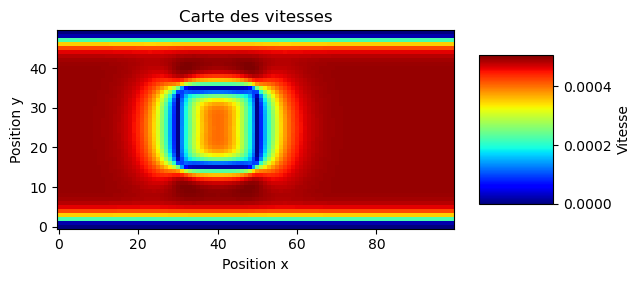

	 Nt = 100 	 Umax = 0.0009812401782334803 	 TimingProcess = 12.34463357925415


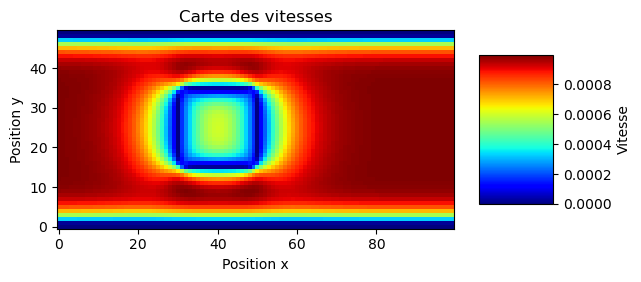

	 Nt = 150 	 Umax = 0.001434167520055961 	 TimingProcess = 19.537046670913696


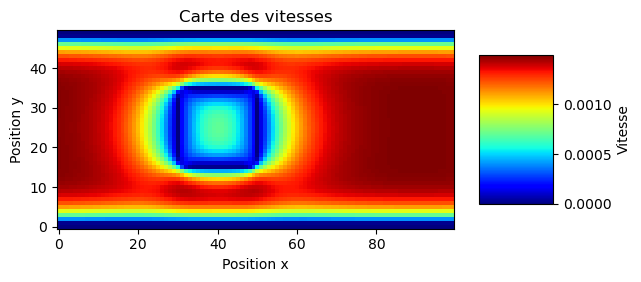

	 Nt = 225 	 Umax = 0.002062661976708239 	 TimingProcess = 27.20340347290039


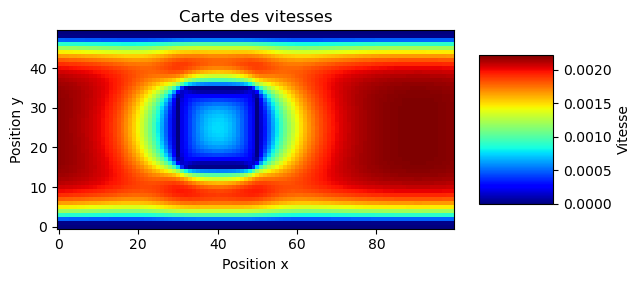

	 Nt = 337 	 Umax = 0.002909398299859217 	 TimingProcess = 41.864285707473755


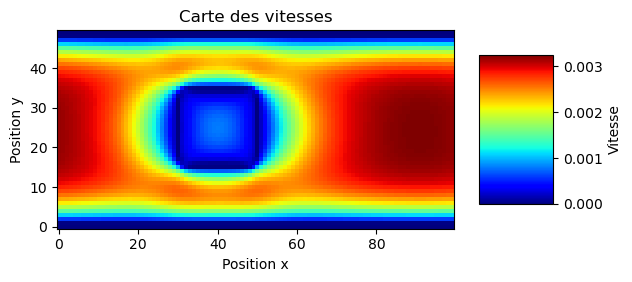

	 Nt = 420 	 Umax = 0.003480955736115604 	 TimingProcess = 53.885175466537476


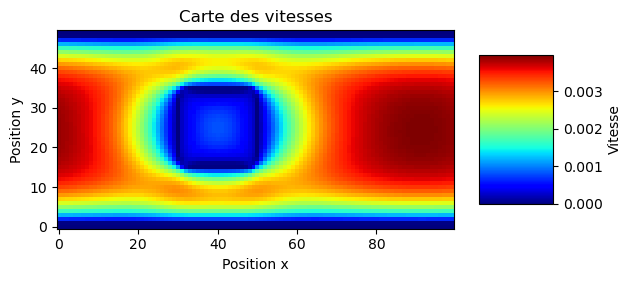

	 Nt = 506 	 Umax = 0.004031448941314145 	 TimingProcess = 64.00112056732178


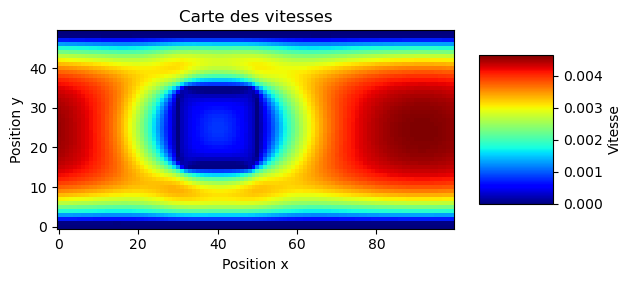

	 Nt = 2500 	 Umax = 0.009060808022004978 	 TimingProcess = 409.42524003982544


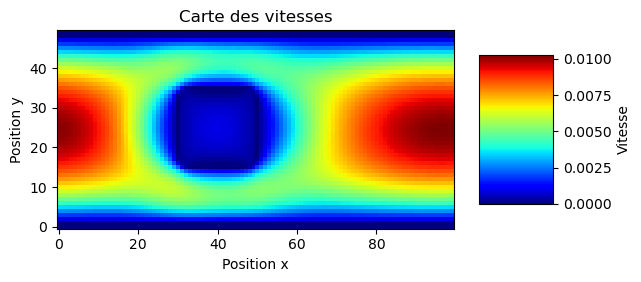

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import time
Nt_values = [50,100, 150, 225, 337,420,506,2500] 
Umax = []
ProcessingTime = []
tau = 0.798

def LBM(Nt,tau) :
    # Définition des paramètres du système
    scale = 1  # échelle de l'espace (utile si vous avez besoin de redimensionner plus tard)
    Nx = 100    # nombre de points en x (largeur du canal)
    Ny = 50     # nombre de points en y (hauteur du canal)
    delta = .5  # échelle du milieu de la grille
    H = Ny - 3  # hauteur du canal, laissant de la place pour les nœuds tampon
    Nt = Nt   # nombre d'itérations (étapes de temps)
    v = 9       # nombre de vitesses dans la méthode D2Q9
    vmap = range(0,v,1)  # liste des indices de vitesse
    tau = tau # temps de relaxation pour un problème dominé par l'advection
    dpdx = 1e-05  # gradient de pression
    rho0 = 1      # densité initiale du fluide
    cs = np.sqrt(1/3)  # vitesse du son dans les unités de la grille
    V = cs**2*(tau-.5)  # viscosité cinématique

    # Définition des vitesses dans les directions x et y (modèle D2Q9)
    cx = [0, 1, 0, -1, 0, -1, 1, -1, 1]  # vitesses dans la direction x
    cy = [0, 0, 1, 0, -1, 1, 1, -1, -1]  # vitesses dans la direction y
    w = [4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36]  # poids associés aux vitesses
    kb = [0, 3, 4, 1, 2, 8, 7, 6, 5]  # table d'indices 
    isn = np.zeros((Nx, Ny))  # matrice indiquant les nœuds solides (1) et les nœuds fluides (0)

    # Initialisation des champs de distribution
    f = np.zeros((v, Nx, Ny))  # tableau des distributions
    ft = np.zeros((v, Nx, Ny))  # tableau temporaire pour les distributions
    term1 = np.zeros((v, Nx, Ny))  # premier terme dans l'équilibre
    term2 = np.zeros((v, Nx, Ny))  # second terme dans l'équilibre

    # Champs de vitesses et densité
    ux = np.zeros((Nx, Ny))  # composante x de la vitesse
    uy = np.zeros((Nx, Ny))  # composante y de la vitesse
    u2 = np.zeros((Nx, Ny))  # vitesse au carré
    rho = np.zeros((Nx, Ny))  # densité du fluide
    source = np.zeros((Nx, Ny))  # source externe (force de pression)
    feq = np.zeros((Nx, Ny))  # distribution d'équilibre
    onemat = np.ones((Nx, Ny))  # matrice de 1 utilisée pour les calculs

    # Enregistrement du temps de départ
    tic = time.time()

    # Initialisation des nœuds solides et fluides
    for i in range(0, Nx, 1):
        for j in range(0, Ny, 1):
            if j == 0 or j == Ny-1:
                isn[i][j] = 1  # nœud solide (murs du canal)
            elif (30<i<50) and (15<j<35) :
                isn[i][j] = 1  # nœud solide (murs du canal) 
            else:
                isn[i][j] = 0  # nœud fluide
            f[:, i, j] = [w[k] * rho0 for k in vmap]  # initialisation des distributions avec la densité rho0

    # Boucle principale pour les étapes de temps (simulation du flux)
    for t in range(1, Nt + 1, 1):
        # Calcul des moments (densité, vitesses) à chaque itération
        for i in range(0, Nx, 1):
            for j in range(1, Ny - 1, 1):  # on ne considère que les nœuds fluides
                rho[i, j] = np.sum(f[:, i, j], axis=0)  # moment d'ordre 0 (densité)
                ux[i, j] = (np.sum([f[k, i, j] * cx[k] for k in vmap]) + 0.5 * dpdx) / rho[i, j]  # moment d'ordre 1, composante x, avec la pression
                uy[i, j] = np.sum([f[k, i, j] * cy[k] for k in vmap]) / rho[i, j]  # moment d'ordre 1, composante y
        
        u2 = np.multiply(ux, ux) + np.multiply(uy, uy) 
        term1 = np.array([ux * cx[k] + uy * cy[k] for k in vmap])  # calcul des termes intermédiaires pour l'équilibre
        term2 = np.multiply(term1, term1)  # calcul du second terme
        source = np.array([(1.0 - 0.5 / tau) * w[k] * (3 * (cx[k] - ux) + 9 * (cx[k] * ux + cy[k] * uy) * cx[k]) * dpdx for k in vmap])  # source de pression
        feq = np.array([w[k] * rho * (onemat + 3 * term1[k] + 4.5 * term2[k] - 1.5 * u2) for k in vmap])  # distribution d'équilibre
        ft = np.array([f[k] - (f[k] - feq[k]) / tau + source[k] for k in vmap])  # mise à jour des distributions

        # La périodicité n'existe qu'en direction x, donc on applique la rotation uniquement dans cette direction
        f[1, :, 1:-1] = np.roll(ft[1, :, 1:-1], [1, 0], axis=(0, 1))
        f[2, :, 1:-1] = np.roll(ft[2, :, 1:-1], [0, 1], axis=(0, 1))
        f[3, :, 1:-1] = np.roll(ft[3, :, 1:-1], [-1, 0], axis=(0, 1))
        f[4, :, 1:-1] = np.roll(ft[4, :, 1:-1], [0, -1], axis=(0, 1))
        f[5, :, 1:-1] = np.roll(ft[5, :, 1:-1], [-1, 1], axis=(0, 1))
        f[6, :, 1:-1] = np.roll(ft[6, :, 1:-1], [1, 1], axis=(0, 1))
        f[7, :, 1:-1] = np.roll(ft[7, :, 1:-1], [-1, -1], axis=(0, 1))
        f[8, :, 1:-1] = np.roll(ft[8, :, 1:-1], [1, -1], axis=(0, 1))

        # Étape de rebond (bounce-back)
        # Si un nœud fluide a un voisin solide, on applique le rebond des particules
        for i in range(0, Nx, 1):
            for j in range(0, Ny, 1):
                if isn[i][j] == 0:  # On regarde uniquement les nœuds fluides
                    for k in vmap:
                        ia = i - cx[k]
                        ja = j - cy[k]
                        if ia < 0: 
                            ia = Nx - 1
                        elif ia > Nx - 1:
                            ia = 0
                        if isn[ia][ja] == 1:  # voisin solide
                            oppV = int(kb[k])  # trouver la vitesse opposée
                            f[k][i][j] = f[oppV][i][j]  # appliquer le rebond

    # Affichage du temps d'exécution

    # Listes pour stocker les résultats
    momentx = []  # composante x de la vitesse du fluide à la sortie
    momenty = []  # composante y de la vitesse du fluide à la sortie
    height = []    # hauteur des nœuds fluides

    # Générer la courbe théorique (solution exacte du problème de Poiseuille)
    ux_exact = [0] * (Ny - 2)  
    for j in range(0, Ny - 2, 1): 
        y = j / H
        y2 = y * y
        ux_exact[j] = 0.5 * dpdx * H * H * (y - y2) / V  # formule exacte du flux de Poiseuille
        height.append(j)

    # Collecte des résultats LBM pour comparaison avec la théorie
    i = 10  # Nous regardons à la sortie du canal
    for j in range(1, Ny - 1, 1): 
        rho = 0.0
        ux = 0.0
        uy = 0.0
        for k in vmap:
            rho += f[k][i][j]
            ux += f[k][i][j] * cx[k]
            uy += f[k][i][j] * cy[k]
        ux /= rho
        uy /= rho
        momentx.append(ux)
        momenty.append(uy)

    um = max(momentx)
    Umax.append(um)
    timingprocess = time.time() - tic # when calulating process ends
    print(f"\t Nt = {Nt} \t Umax = {um} \t TimingProcess = {timingprocess}")

    fig = plt.figure()
    plt.imshow(np.sqrt(u2).T, origin="lower", cmap="jet", aspect="equal")
    plt.colorbar(label="Vitesse", aspect= 2)
    plt.xlabel("Position x")
    plt.ylabel("Position y")
    plt.title("Carte des vitesses")
    plt.show()

i = 0
while i < len(Nt_values):
    LBM(Nt_values[i],tau)
    i += 1